In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [23]:
df=pd.read_csv('data/Stud.csv')

In [24]:
df.shape

(1000, 8)

In [25]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [26]:
# DATA CHECKS TO PERFORM
# CHECK MISSING VALUES
# CHECK DUPLICATES
# CHECK DATA TYPES
# CHECK NUMBER OF UNIQUE VALUES OF EACH COLUMN
# CHECK STATISTICS OF DATA SET
# CHECK VARIOUS CATERGOIRES PRESENT IN DIFFERENT CATEGORIAL COLUMNS

# CHECK MISSING VALUES

In [27]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## there are no missing values in the dataset

# CHECK DUPLICATES

In [28]:
df.duplicated().sum()

0

## there are no duplicated values in the dataset

# CHECK DATA TYPES

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# CHECK NUMBER OF UNIQUE VALUES OF EACH COLUMN

In [30]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

# CHECK STATISTICS OF DATA SET

In [31]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights 

1) All means are very close to each other
2) All standard deviation are close between 14.6 and 15.6
3) Minimum score in maths is Zero for reading and writing its 17 and 10 respectivly 

In [33]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [34]:
print("Categories in gender variable   ",end = ' ')
print(df['gender'].unique())

print("Categories in race/ethnicity	 variable   ",end = ' ')
print(df['race/ethnicity'].unique())

print("Categories in parental level of education variable   ",end = ' ')
print(df['parental level of education'].unique())

print("lunch",end = ' ')
print(df['lunch'].unique())

print("Categories in test preparation course variable   ",end = ' ')
print(df['test preparation course'].unique())

Categories in gender variable    ['female' 'male']
Categories in race/ethnicity	 variable    ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education variable    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch ['standard' 'free/reduced']
Categories in test preparation course variable    ['none' 'completed']


# define numerical and categorial features

In [42]:
numeric_feature=[]
categorial_feature=[]
for i in df.columns:
    if df[i].dtype != 'O':
        numeric_feature.append(i)

categorial_feature=[]
for i in df.columns:
    if df[i].dtype == 'O':
        categorial_feature.append(i)

In [1]:
print (" we have a total of {} numerical featuers {}".format(len(numeric_feature),numeric_feature))
print ("\n we have a total of {} categorical featuers {}".format(len(categorial_feature),categorial_feature))

NameError: name 'numeric_feature' is not defined

In [47]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [49]:
df['Total Score']=df['math score']+df['reading score']+df['writing score']
df['Average']=df['Total Score']/3
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [60]:
reading_full = df[df['reading score']==100]['reading score'].count()
writing_full = df[df['writing score']==100]['writing score'].count()
math_full = df[df['math score']==100]['math score'].count()

print("number of students with full marks in math {}".format(math_full))
print("number of students with full marks in writing {}".format(writing_full))
print("number of students with full marks in reading {}".format(reading_full))

number of students with full marks in math 7
number of students with full marks in writing 14
number of students with full marks in reading 17


In [64]:
reading_less_20 = df[df['reading score']<=20]['reading score'].count()
writing_less_20 = df[df['writing score']<=20]['writing score'].count()
math_less_20 = df[df['math score']<=20]['math score'].count()

print("number of students with less than 20 marks in math {}".format(math_less_20))
print("number of students with less than 20 marks in writing {}".format(writing_less_20))
print("number of students with less than 20 marks in reading {}".format(reading_less_20))

number of students with less than 20 marks in math 4
number of students with less than 20 marks in writing 3
number of students with less than 20 marks in reading 1


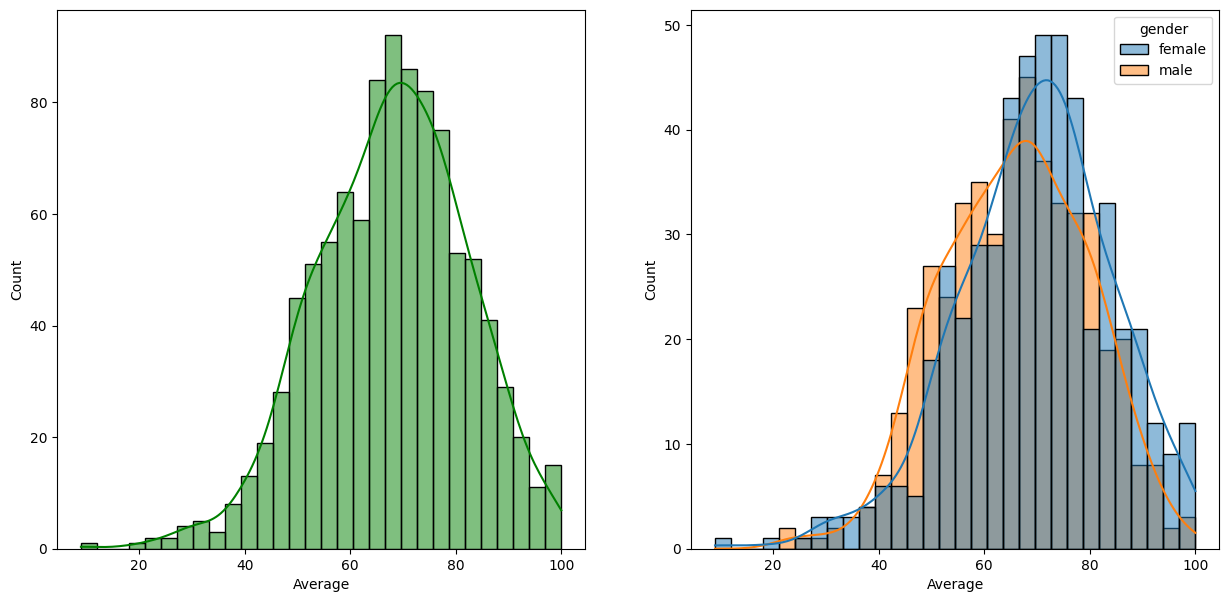

In [96]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average',bins=30,kde=True,hue='gender')
#plt.subplot(133)
#sns.histplot(data=df,x='Average',bins=30,kde=True,hue='race/ethnicity')
#A 3-digit integer. The digits are interpreted as if given separately
#      as three single-digit integers, i.e. ``fig.add_subplot(235)`` is the
#      same as ``fig.add_subplot(2, 3, 5)``. Note that this can only be used
#     if there are no more than 9 subplots.
plt.show()

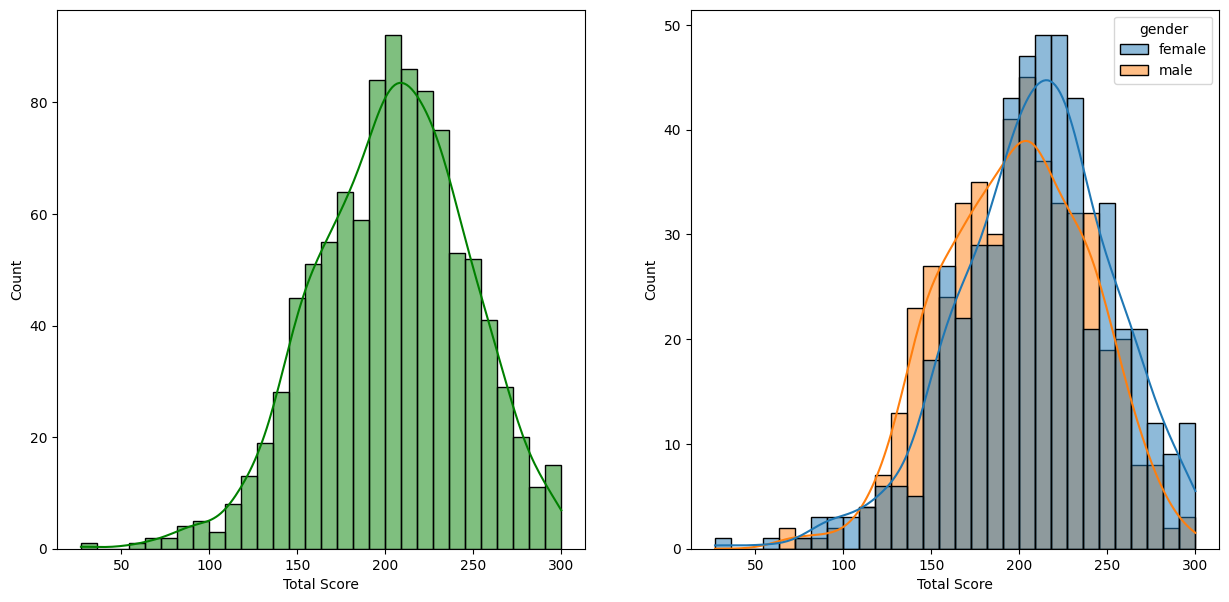

In [97]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Total Score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total Score',bins=30,kde=True,hue='gender')
#plt.subplot(133)
#sns.histplot(data=df,x='Average',bins=30,kde=True,hue='race/ethnicity')
#A 3-digit integer. The digits are interpreted as if given separately
#      as three single-digit integers, i.e. ``fig.add_subplot(235)`` is the
#      same as ``fig.add_subplot(2, 3, 5)``. Note that this can only be used
#     if there are no more than 9 subplots.
plt.show()

Insights :

Female students tend to perform well then male students.

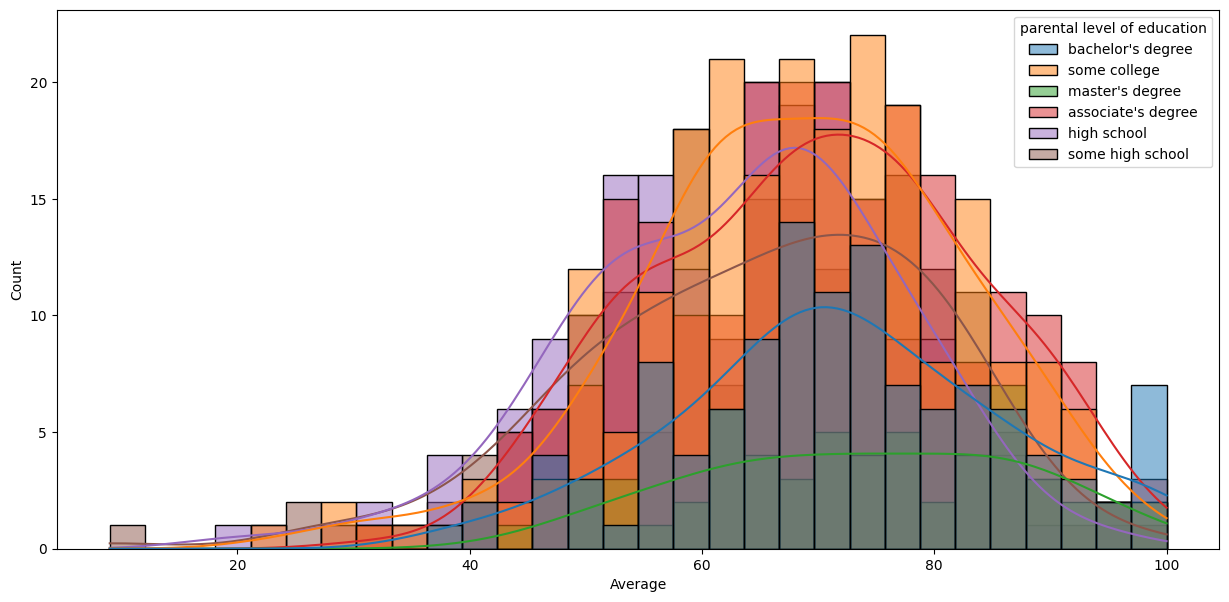

In [100]:
fig, axs = plt.subplots(1,1,figsize=(15,7))
plt.subplot(111)
sns.histplot(data=df,x='Average',bins=30,kde=True,color='g',hue='parental level of education')
#plt.subplot(132)
#sns.histplot(data=df[df.gender=='male'],x='Average',bins=30,kde=True,hue='parental level of education')
#plt.subplot(133)
#sns.histplot(data=df[df.gender=='female'],x='Average',bins=30,kde=True,hue='parental level of education')
#plt.subplot(133)
#sns.histplot(data=df,x='Average',bins=30,kde=True,hue='race/ethnicity')
#A 3-digit integer. The digits are interpreted as if given separately
#      as three single-digit integers, i.e. ``fig.add_subplot(235)`` is the
#      same as ``fig.add_subplot(2, 3, 5)``. Note that this can only be used
#     if there are no more than 9 subplots.
plt.show()

Insights :
In general parent's education don't help student perform well in exam.

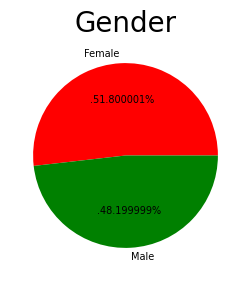

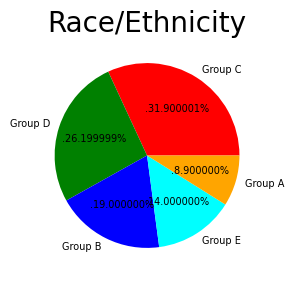

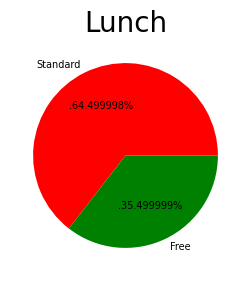

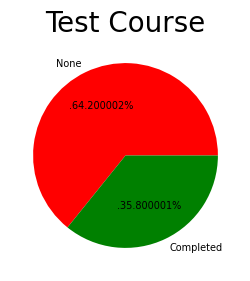

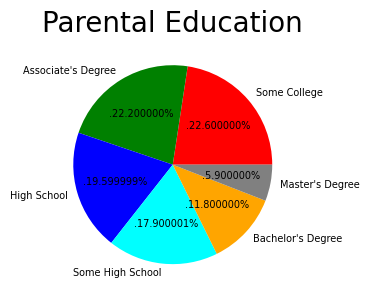

In [110]:
plt.rcParams["figure.figsize"] = (20,3)
plt.rcParams.update({'font.size': 7})


size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)

plt.show()

size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)

plt.show()



size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)

plt.show()

size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)

plt.show()

size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)


plt.tight_layout()
 

plt.show()

In [124]:
#df.count()

In [126]:
gender_group = df.groupby('gender').count()
gender_group


518

In [129]:
print(gender_group['Average'][0])
print(gender_group['Average'][1])
print(len(X))

518
482
2


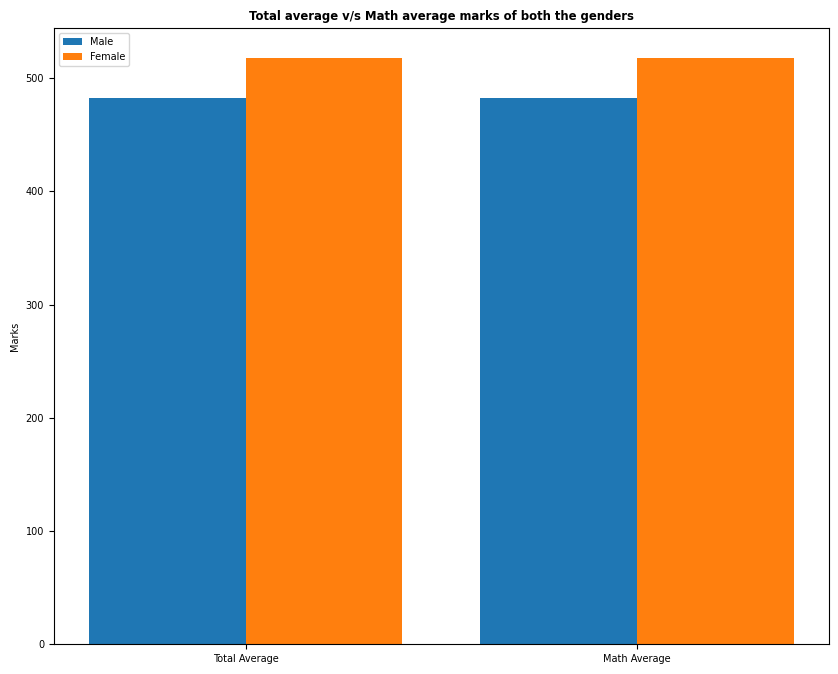

In [121]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['Average'][0], gender_group['math score'][0]]
male_scores = [gender_group['Average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()